# Bank Churn Prediction

## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Context: 

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
Data Description: 

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data Dictionary:

1. RowNumber: Row number 
2. CustomerId: Unique identification key for different customers.
3. Surname: Surname of the customer
4. Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
5. Geography: The country to which the customer belongs.
6. Gender: The gender of the customer.
7. Age: Age of the customer.
8. Tenure: The period of time a customer has been associated with the bank.
9. Balance: The account balance (the amount of money deposited in the bank account) of the customer.
10. NumOfProducts: How many accounts, bank account affiliated products the person has.
11. HasCrCard: Does the customer have a credit card through the bank?
12. IsActiveMember: Subjective, but for the concept
13. EstimatedSalary: Estimated salary of the customer.
14.Exited: Did they leave the bank after all?


## Points Distribution:

The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from keras.layers import Dropout, Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
project_path = '/content/drive/My Drive/Colab/dataset/'

In [ ]:
dataset_file = project_path + 'bank_nn.csv'

In [ ]:
# reading the dataset
bdata = pd.read_csv(dataset_file)

## Expolratory Data Analysis (EDA)

In [ ]:
bdata.shape

(10000, 14)

In [ ]:
bdata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bdata.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
bdata.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
bdata.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

no Null Data

*# 
 One hot coding for geographical places & gender. transforming *Tables*



In [ ]:
bdata = bdata.drop (['RowNumber','CustomerId','Surname'], axis=1)


*#  One hot coding for geographical places & gender. transforming *Tables*

In [ ]:
bdata = pd.get_dummies(bdata, columns=['Geography','Gender'])

In [ ]:
bdata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Mean Value


In [ ]:
bdata.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
Exited,,,,,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.527942,0.212859,0.259199,0.427477,0.572523
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.397644,0.399607,0.202749,0.559156,0.440844


In [ ]:
bdata.skew()

CreditScore         -0.071607
Age                  1.011320
Tenure               0.010991
Balance             -0.141109
NumOfProducts        0.745568
HasCrCard           -0.901812
IsActiveMember      -0.060437
EstimatedSalary      0.002085
Exited               1.471611
Geography_France    -0.005601
Geography_Germany    1.149340
Geography_Spain      1.169106
Gender_Female        0.183596
Gender_Male         -0.183596
dtype: float64

In [ ]:
sns.pairplot(bdata)

In [ ]:
fig,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(bdata.corr(), annot=True, cmap=plt.cm.GnBu_r)

In [ ]:
x=bdata.drop(['Exited'], axis=1)
y=bdata['Exited']

## Distinguish the feature and target set and divide the data set into training and test sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

## Normalize the train and test data

In [ ]:
#from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

# Scale the train set
x_train = scaler.transform(x_train)

# Scale the test set
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


# if i normalizing am getting accuracy less than 81%

# if i StandardScaler am getting accuracy over 85% 

# using labelencoder not transforming tables such as (Gender_male ==1, Gender_female==1) is best way of distributing data (transforming tables such as (Gender_male, Gender_female) and Geography )



## Initialize & build the model. Identify the points of improvement and implement the same.

In [ ]:
model = Sequential()

In [ ]:
## Adding the input layer and the first hidden layer

# add() method belongs to the sequential class.
# add a fully connected layer (hidden), which will be a new object for the dense class.
# Argument for dense() - 
# 'units' - There are called hyperparameters and are the hidden neurons.
# 'activation' - activation function in the hidden layer must be a rectifier activation function.
# 'relu' - codename for rectifier activation function.
# model.add(Dense(100, input_shape = (10,), activation = 'relu'))
#model.add(Dense(50, activation = 'relu'))
#model.add(Dense(25, activation = 'relu'))
#model.add(Dense(1, activation = 'sigmoid'))
#model.add(Dense(100, input_shape = (10,), activation = 'softmax'))
#model.add(Dense(100, activation = 'softmax'))
#model.add(Dense(6, activation = 'relu'))

model.add(Dense(100, input_shape = (13,), activation = 'relu'))
model.add(Dense(50, activation = 'relu'))


In [ ]:
## Adding the second hidden layer
#model.add(Dense(50, activation = 'relu'))

In [ ]:
## Adding the third hidden layer
#from keras.layers import LeakyReLU
# here change your line to leave out an activation 
#model.add(Dense(25))
# now add a ReLU layer explicitly:
#model.add(LeakyReLU(alpha=0.05))

In [ ]:
## Adding the output layer

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
## Compiling the ANN
# Arguments - 
# 'optimizer' - We choose 'adam' optimizer as it can perform stochastic gradient descent. 
#  The stochastic gradient descent will optimize the weights to minimize the loss between the actual and the predicted values.
# 'loss' - When we are doing a binary classification when we are predicting a binary variable use 'binary_crossentropy' and 
#  if we had categorical variable to predict we would have used 'categorical_crossentropy'
# 'metrics' - 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, batch_size = 2500, epochs = 50, validation_split=.2,  verbose = 1)
#model.fit(x_train, y_train, batch_size = 16, epochs = 100, validation_split=.2,  verbose = 1)

Epoch 1/50
3/3 [==============================] - 1s 256ms/step - loss: 0.7508 - accuracy: 0.3498 - val_loss: 0.6837 - val_accuracy: 0.5587
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6640 - accuracy: 0.6291 - val_loss: 0.6190 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6016 - accuracy: 0.7811 - val_loss: 0.5734 - val_accuracy: 0.7894
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5602 - accuracy: 0.7941 - val_loss: 0.5437 - val_accuracy: 0.7894
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5276 - accuracy: 0.7987 - val_loss: 0.5257 - val_accuracy: 0.7894
Epoch 6/50
3/3 [==============================] - 0s 24ms/step - loss: 0.5068 - accuracy: 0.8005 - val_loss: 0.5156 - val_accuracy: 0.7894
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.4981 - accuracy: 0.7968 - val_loss: 0.5091 - val_accuracy: 0.7894
Epoch 8/50
3/3 [==========

In [ ]:
results = model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8570


## Predict the results using 0.5 as a threshold

In [ ]:
# Making prediction
y_pred = model.predict(x_test)
y_pred

array([[0.25771403],
       [0.19156298],
       [0.04555553],
       ...,
       [0.16686666],
       [0.28586727],
       [0.12227994]], dtype=float32)

In [ ]:
# Convert probabilities into true or false - threshold = 0.5
y_pred = (y_pred > 0.5)

## Print the Accuracy score and confusion matrix 

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1540   49]
 [ 237  174]]


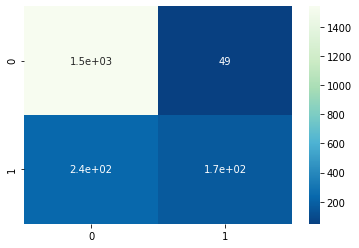

In [ ]:
sns.heatmap(cm, annot=True, cmap=plt.cm.GnBu_r )

In [ ]:
_, Train_Accuracy = model.evaluate(x_train, y_train, verbose=1)

250/250 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8596


In [ ]:
_, Test_Accuracy = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8570


In [ ]:
print('Train accuracy: %.3f %%' % (Train_Accuracy * 100))
print('Test accuracy:\t%.3f %%' % (Test_Accuracy * 100))


Train accuracy: 85.962 %
Test accuracy:	85.700 %


Therefore, Accuracy = 85%

1. Total correct predictions that customers stay in bank = 1540
2. Total correct predictions that customers leave the bank = 174
3. Total incorrect predictions that customers stay in the bank = 237
4. Total incorrect predictions that customers leave in the bank = 49


